# pIC50

Provem si fent el log del IC50 podem fer una millor classificacio de les molecules que tenim
i tambe ens anira millor per veure si tenim bones dades 

The range of pIC50 values for a potent drug varies depending on the specific context and the desired level of inhibition. However, higher pIC50 values indicate more potent drugs in inhibiting the biological process. According to a study on soluble epoxide hydrolase inhibitors, the inhibitory potencies range from 6.7 to 9.4, with a mean pIC50 value of 7.9 ± 1.0
Another study on discovering highly potent molecules found that compounds with a pIC50 value < 6 were considered inactive, while those with an activity > 6 pIC50 were considered potentially potent
Therefore, a pIC50 value of 7 or higher can be considered a good range for a potent drug.

https://pubs.acs.org/doi/pdf/10.1021/acs.jcim.3c00301

https://core.ac.uk/download/pdf/200999669.pdf



In [37]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd

df = pd.read_csv('../Data/SMILES_NRAS_ligands_features.csv')
print(df.columns)


Index(['SMILES', 'Formula', 'Peso Molecular', 'LogP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds', 'IC50'],
      dtype='object')


In [38]:
#primer necessito passar de nM a M el IC50

df['IC50M'] = df['IC50'] / 1e9
print(df.head)

<bound method NDFrame.head of                                                 SMILES      Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1    C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1    C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1    C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...    C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...   C26H32N8O2   
..                                                 ...          ...   
648  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C49H62N8O8   
649  CC(C)[C@H](N(C)C(=O)[C@H]1CCN(C1)C(=O)C=C)C(=O...   C50H60N8O7   
650  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H70N8O8   
651  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H69N9O7   
652  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO...  C24H28N2O9S   

     Peso Molecular     LogP  H-bond donor  H-bond acceptor    TPSA  \
0        375.180758  2.56880             3    

In [39]:
#ara fem el pIC50
import numpy as np

df['pIC50'] = -np.log10(df['IC50M'])
print(df.head)

<bound method NDFrame.head of                                                 SMILES      Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1    C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1    C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1    C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...    C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...   C26H32N8O2   
..                                                 ...          ...   
648  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C49H62N8O8   
649  CC(C)[C@H](N(C)C(=O)[C@H]1CCN(C1)C(=O)C=C)C(=O...   C50H60N8O7   
650  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H70N8O8   
651  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H69N9O7   
652  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO...  C24H28N2O9S   

     Peso Molecular     LogP  H-bond donor  H-bond acceptor    TPSA  \
0        375.180758  2.56880             3    

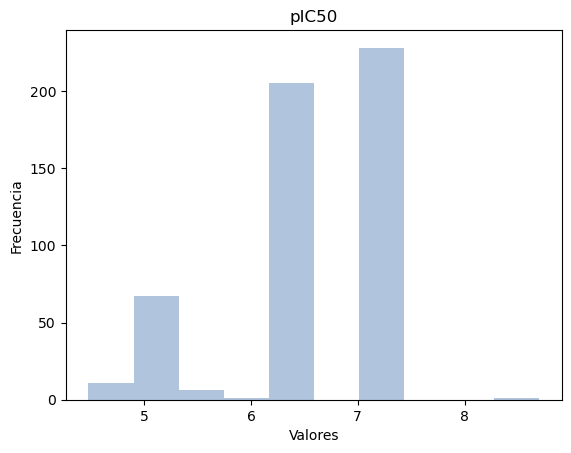

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el histograma
fig, ax = plt.subplots()
ax.hist(df['pIC50'], color = "lightsteelblue")

# Personalizar el histograma (opcional)
plt.title('pIC50')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


In [41]:
# Eliminam les columnes IC50 i IC50M

delate_columns = ['IC50', 'IC50M']
for column in delate_columns:
    del df[column]

#guardo per la regressio
df.to_csv('../Data/pIC50_regression.csv', index=False)

summary = df.describe()
print(summary)

       Peso Molecular        LogP  H-bond donor  H-bond acceptor        TPSA  \
count      653.000000  653.000000    653.000000       653.000000  653.000000   
mean       921.759004    5.772324      2.336907        11.620214  167.667443   
std        117.814064    1.012752      0.580724         1.405409   20.722815   
min        299.093773    0.510500      2.000000         5.000000   54.250000   
25%        903.489462    5.372700      2.000000        11.000000  160.040000   
50%        937.452031    5.883300      2.000000        12.000000  171.540000   
75%        973.578946    6.386100      3.000000        12.000000  178.880000   
max       1154.630408    8.069200      6.000000        16.000000  254.790000   

       Rotatable bonds       pIC50  
count       653.000000  519.000000  
mean          9.820827    6.530814  
std           1.514772    0.753809  
min           3.000000    4.479255  
25%           9.000000    6.259637  
50%          10.000000    6.259637  
75%          11.0000

In [42]:
# Definir función para asignar valores enteros
def asignar_valor(valor, limite):
    
    if valor <= limite:
        classif = 0
    else:
        classif =  1
    print(valor, limite, classif)
    return classif

# Definir el valor límite
limite = 7

# Aplicar la función a la columna y reemplazar los valores
df['pIC50'] = df['pIC50'].apply(lambda x: asignar_valor(x, limite))

# Mostrar el DataFrame resultante
print(df)

4.479254528480518 7 0
5.0034883278458215 7 0
5.73754891026957 7 0
4.803547458296611 7 0
4.803547458296611 7 0
5.3535962737769305 7 0
4.82915179635669 7 0
5.029188389127482 7 0
4.779107750780481 7 0
5.429457060118103 7 0
4.526367073126159 7 0
5.3535962737769305 7 0
4.779107750780481 7 0
8.698970004336019 7 1
5.253365801062421 7 0
6.20342566678957 7 0
4.753501419204199 7 0
4.779107750780481 7 0
4.679230771661313 7 0
5.367542707815276 7 0
4.779107750780481 7 0
5.7544873321858505 7 0
5.72584215073632 7 0
5.029188389127482 7 0
7.259637310505756 7 1
5.259637310505756 7 0
nan 7 1
7.259637310505756 7 1
6.259637310505756 7 0
7.259637310505756 7 1
6.259637310505756 7 0
nan 7 1
nan 7 1
6.259637310505756 7 0
nan 7 1
nan 7 1
5.259637310505756 7 0
7.259637310505756 7 1
7.259637310505756 7 1
7.259637310505756 7 1
5.259637310505756 7 0
nan 7 1
6.259637310505756 7 0
5.259637310505756 7 0
6.259637310505756 7 0
6.259637310505756 7 0
nan 7 1
6.259637310505756 7 0
nan 7 1
6.259637310505756 7 0
6.2596373105

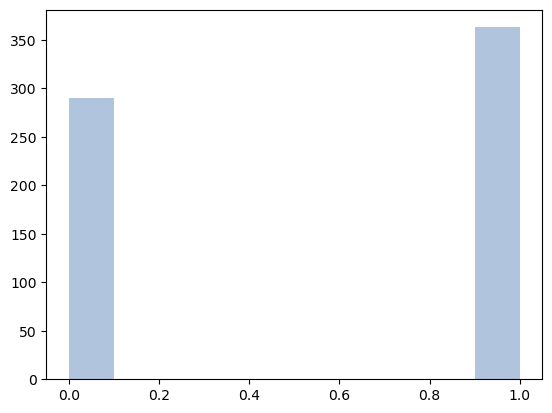

In [45]:
fig, ax = plt.subplots()
ax.hist(df['pIC50'], color = "lightsteelblue")

plt.show()

In [23]:
# Mostrar el DataFrame resultante
print(df.columns)
print(df)

Index(['SMILES', 'Formula', 'Peso Molecular', 'LogP', 'H-bond donor',
       'H-bond acceptor', 'TPSA', 'Rotatable bonds', 'pIC50'],
      dtype='object')
                                                SMILES      Formula  \
0      COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cn[nH]c1    C20H21N7O   
1        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cccnc1    C22H22N6O   
2        COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1ccncc1    C22H22N6O   
3    Cc1n[nH]c(C)c1-c1cn2c(cnc2cc1CO)-c1cccc(NC2CCN...    C22H25N7O   
4    COc1cc2ncc(-c3cccc(NC4CCNC4)n3)n2cc1-c1cnn(CCN...   C26H32N8O2   
..                                                 ...          ...   
648  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C49H62N8O8   
649  CC(C)[C@H](N(C)C(=O)[C@H]1CCN(C1)C(=O)C=C)C(=O...   C50H60N8O7   
650  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H70N8O8   
651  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...   C53H69N9O7   
652  OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)N(CCO...  C24H28N2

In [24]:
df.to_csv('../Data/pIC50_NRAS.csv', index=False)